In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

%matplotlib inline

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def load_dataset(path):
    import h5py
    train_dataset = h5py.File(path + 'train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File(path + 'test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

X_train, Y_train, X_test, Y_test, classes = load_dataset("/data/handsigns/")
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape, classes

((1080, 64, 64, 3),
 (120, 64, 64, 3),
 (1, 1080),
 (1, 120),
 array([0, 1, 2, 3, 4, 5]))

In [3]:
keras.utils.to_categorical(Y_train.squeeze()).shape

(1080, 6)

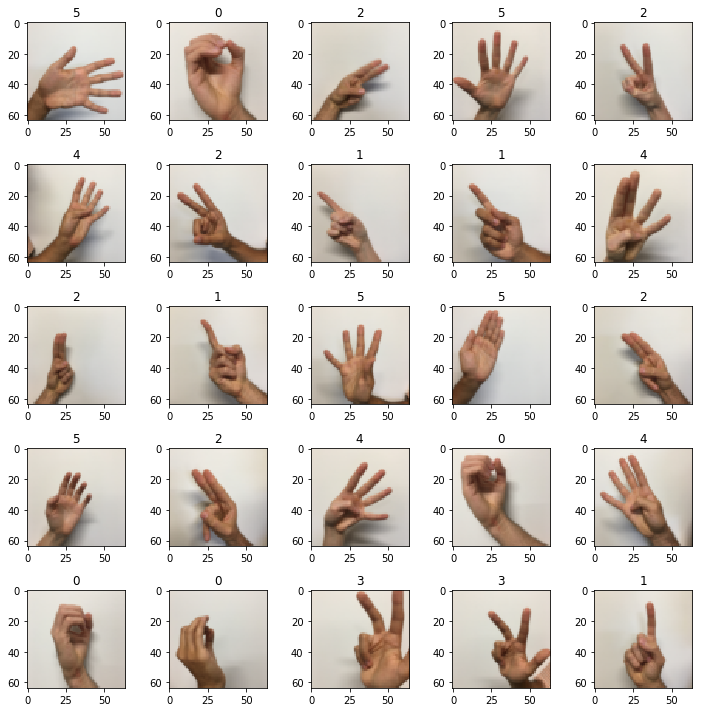

In [4]:
fig, _ = plt.subplots(5, 5, figsize= (10, 10))
for i, ax in enumerate(fig.axes):
    ax.imshow(X_train[i])
    ax.set_title(Y_train[0, i])
    
plt.tight_layout()

In [5]:
tf.set_random_seed(1)
np.random.seed(1)

def build_model(input_shape, num_classes):
    from keras import layers
    model = keras.Sequential()
    model.add(layers.Conv2D(activation="relu", 
                            filters=32, 
                            kernel_size=(5, 5), 
                            input_shape = input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(activation="relu", 
                        filters=64, 
                        kernel_size=(3, 3)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(rate=0.8))
    model.add(layers.Dense(400, activation="relu"))
    model.add(layers.Dense(num_classes, activation="softmax"))
    model.compile(loss=keras.losses.categorical_crossentropy
                  , metrics=["accuracy"]
                  , optimizer="adam")
    return model

model = build_model(X_train.shape[1:], 6)
model.summary()

model.fit(x=X_train/255
          , y = keras.utils.to_categorical(Y_train.squeeze())
          , verbose=1
          , batch_size = 64
          , epochs=25)

model.evaluate(x=X_test/255, y = keras.utils.to_categorical(Y_test.squeeze()))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 60, 60, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               5018000   
__________

[0.31408987641334535, 0.8916666626930236]